In [4]:
sgf_path = 'C:/Users/andre/go-ai/data/KGS2001/2000-7-19-1.sgf'
s = open(sgf_path, 'r').read()

In [11]:
s

'(;GM[1]\nFF[4]\nSZ[19]\nPW[guojuan]\nWR[5p]\nPB[wolf]\nBR[1k]\nDT[2000-7-19]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRE[W+Resign]\nHA[5]RU[Japanese]CA[UTF-8]TM[1800]OT[5x30 byo-yomi]AB[dd][pd][jj][dp][pp]\n;W[mp]\n;B[pn]\n;W[fq]\n;B[cn]\n;W[fo]\n;B[nq]\n;W[mq]\n;B[dq]\n;W[ql]\n;B[qm]\n;W[pl]\n;B[nm]\n;W[pg]\n;B[nc]\n;W[np]\n;B[oq]\n;W[on]\n;B[om]\n;W[pm]\n;B[qn]\n;W[cf]\n;B[fc]\n;W[oo]\n;B[lm]\n;W[po]\n;B[qo]\n;W[qp]\n;B[qq]\n;W[rp]\n;B[rq]\n;W[ro]\n;B[op]\n;W[mn]\n;B[sp]\n;W[rm]\n;B[mm]\n;W[mr]\n;B[pr]\n;W[ef]\n;B[ko]\n;W[jp]\n;B[jo]\n;W[ip]\n;B[dk]\n;W[jm]\n;B[km]\n;W[jl]\n;B[lk]\n;W[kj]\n;B[kk]\n;W[jk]\n;B[ij]\n;W[ki]\n;B[in]\n;W[hk]\n;B[hj]\n;W[hm]\n;B[hn]\n;W[gj]\n;B[ih]\n;W[gn]\n;B[mi]\n;W[kg]\n;B[mg]\n;W[if]\n;B[gi]\n;W[fj]\n;B[gg]\n;W[gf]\n;B[hg]\n;W[hf]\n;B[eh]\n;W[dj]\n;B[fg]\n;W[ff]\n;B[ei]\n;W[ej]\n;B[fi]\n;W[ch]\n;B[pi]\n;W[qd]\n;B[pe]\n;W[qe]\n;B[qh]\n;W[qg]\n;B[qc]\n;W[rc]\n;B[qb]\n;W[ph]\n;B[oi]\n;W[qi]\n;B[qj]\n;W[rh]\n;B[le]\n;W[ed]\n;B

In [5]:
from dlgo.gosgf.sgf import *
sgf = Sgf_game.from_string(s)

In [11]:
from dlgo.gosgf.sgf_properties import interpret_go_point
interpret_go_point(b'mp', 19)

(3, 12)

In [17]:
move_name = bytes('AB[ma]', 'utf-8')
interpret_go_point(move_name[move_name.index('[')+1:move_name.index(']')], 19)

TypeError: a bytes-like object is required, not 'str'

In [7]:
for item in sgf.main_sequence_iter():
    print(item, item.get_move())

AB[dd][pd][jj][dp][pp]
BR[1k]
CA[UTF-8]
DT[2000-7-19]
FF[4]
GM[1]
HA[5]
KM[0.50]
OT[5x30 byo-yomi]
PB[wolf]
PC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]
PW[guojuan]
RE[W+Resign]
RU[Japanese]
SZ[19]
TM[1800]
WR[5p]
 (None, None)
W[mp]
 ('w', (3, 12))
B[pn]
 ('b', (5, 15))
W[fq]
 ('w', (2, 5))
B[cn]
 ('b', (5, 2))
W[fo]
 ('w', (4, 5))
B[nq]
 ('b', (2, 13))
W[mq]
 ('w', (2, 12))
B[dq]
 ('b', (2, 3))
W[ql]
 ('w', (7, 16))
B[qm]
 ('b', (6, 16))
W[pl]
 ('w', (7, 15))
B[nm]
 ('b', (6, 13))
W[pg]
 ('w', (12, 15))
B[nc]
 ('b', (16, 13))
W[np]
 ('w', (3, 13))
B[oq]
 ('b', (2, 14))
W[on]
 ('w', (5, 14))
B[om]
 ('b', (6, 14))
W[pm]
 ('w', (6, 15))
B[qn]
 ('b', (5, 16))
W[cf]
 ('w', (13, 2))
B[fc]
 ('b', (16, 5))
W[oo]
 ('w', (4, 14))
B[lm]
 ('b', (6, 11))
W[po]
 ('w', (4, 15))
B[qo]
 ('b', (4, 16))
W[qp]
 ('w', (3, 16))
B[qq]
 ('b', (2, 16))
W[rp]
 ('w', (3, 17))
B[rq]
 ('b', (2, 17))
W[ro]
 ('w', (4, 17))
B[op]
 ('b', (3, 14))
W[mn]
 ('w', (5, 12))
B[sp]
 ('b', (3, 18))
W[rm]
 ('w',

In [1]:
from utils import *
ants = read_pkl('data/filtered_annotations.pkl')

In [2]:
from datasets import *
a = load_to_memory(SPBoWDataset(ants, ['territory', 'eye']))

  1%|▊                                                                                                             | 1674/234063 [00:03<09:13, 420.20it/s]


KeyboardInterrupt: 

In [3]:
a[3]

NameError: name 'a' is not defined

In [16]:
import gzip
import os
import shutil
import tarfile
from dlgo.gosgf.sgf import *

from dlgo import goboard_fast as goboard

def process_zip(dir_name, tar_file_name, feature_and_label):
    zip_file = tarfile.open(dir_name + '/' + tar_file_name)
    name_list = zip_file.getnames()[1:]
    
    feature_file_base = dir_name + '/' + tar_file_name + '_features_%d'
    label_file_base = dir_name + '/' + tar_file_name + '_labels_%d'
    counter = 0
    
    for name in name_list:
        if not name.endswith('.sgf'):
            continue
        sgf_content = zip_file.extractfile(name).read()
        sgf = Sgf_game.from_string(sgf_content)
        game = goboard.GameState.new_game(19)
        first_move_done = False
        for setup in sgf.get_root().get_setup_stones():
            for row, col in setup:
                game.board.place_stone(Player.black, Point(row+1, col+1))
                first_move_done = True
        for item in sgf.main_sequence_iter():
            color, move = item.get_move()
            if color is not None and move is not None:
                row, col = move
                if first_move_done:
                    X, y = feature_and_label(game, sgf)
                    
                    pass
                game.board.place_stone(Player.black if color is 'b' else Player.white,
                                       Point(row+1, col+1))
        
       
        

process_zip('C:/Users/andre/go-ai/data', 'KGS-2001-19-2298-.tar')

AssertionError: 

In [1]:
from io_utils import *
ants = read_pkl('data/filtered_annotations.pkl')

In [33]:
aants = [ant for ant in ants if 'A' in ant['sgf']]
s = aants[31]['sgf']

In [26]:
sgf_sample

[b'(;GM[1]\nFF[4]\nSZ[19]\nPW[IZENA]\nWR[7d]\nPB[twin]\nBR[1d]\nDT[2001-01-01]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRU[Japanese]CA[UTF-8]TM[4800]OT[5x90 byo-yomi]\n;B[pd]\n;W[ed]\n;B[pp]\n;W[nc]\n;B[pf]\n;W[nq]\n;B[jp]\n;W[qq]\n;B[pq]\n;W[qp]\n;B[po]\n;W[pr]\n;B[or]\n;W[qr]\n;B[oq]\n;W[qn]\n;B[np]\n;W[pg]\n;B[og]\n;W[ph]\n;B[kd]\n;W[qf]\n;B[of]\n;W[qc]\n;B[qe]\n;W[pc]\n;B[pj]\n;W[oh]\n;B[pm]\n;W[qm]\n;B[pl]\n;W[mg]\n;B[md]\n;W[rf]\n;B[re]\n;W[ng]\n;B[nd]\n;W[nj]\n;B[oc]\n;W[ob]\n;B[od]\n;W[mb]\n;B[kg]\n;W[nm]\n;B[pn]\n;W[kh]\n;B[jg]\n;W[lg]\n;B[ep]\n;W[jh]\n;B[lj]\n;W[ig]\n;B[mi]\n;W[ni]\n;B[kf]\n;W[lk]\n;B[kk]\n;W[mj]\n;B[ll]\n;W[mk]\n;B[kl]\n;W[kj]\n;B[mc]\n;W[nb]\n;B[gc]\n;W[gq]\n;B[eq]\n;W[jr]\n;B[jq]\n;W[kr]\n;B[ir]\n;W[dr]\n;B[hq]\n;W[cp]\n;B[cq]\n;W[dq]\n;B[dp]\n;W[bq]\n;B[cr]\n;W[br]\n;B[co]\n;W[cs]\n;B[jj]\n;W[li]\n;B[df]\n;W[gd]\n;B[hc]\n;W[fc]\n;B[dc]\n;W[dd]\n;B[fb]\n;W[hd]\n;B[ic]\n;W[dj]\n;B[ec]\n;W[fd]\n;B[dl]\n;W[bo]\n;B[dh]\n;W[ek]\n;B

In [39]:
s

'SZ[19];AB[dd];AB[pd];AB[jj];AB[dp];AB[pp];W[jq];B[jd];W[nq];B[qn];W[cf];B[fc];W[bd];B[cc];W[ci];B[pj];W[nc];B[pc];W[qf];B[pf];W[pg];B[qe];W[of];B[pe];W[ng];B[qg];W[qh];B[rf];W[ph];B[fq];W[cp];B[cq];W[co];B[bq];W[cl];B[lq];W[no];B[mp];W[np];B[ln];W[lr];B[nm];W[kq];B[nd];W[md];B[mc];W[lc];B[mb];W[lb];B[ld];W[me];B[nb];W[kd];B[le];W[ke];B[lf];W[jc];B[mf];W[ne];B[nf];W[oe];B[od];W[og];B[lh];W[mh];B[lg];W[qj];B[qk];W[rk];B[qi];W[rj];B[rh];W[oj];B[pk];W[pi];B[nj];W[ri];B[ok];W[rm];B[rn];W[oi];B[si];W[sj];B[sl];W[sh];B[rg];W[mi];B[ki];W[lj];B[mk];W[kk];B[il];W[jk];B[ik];W[rl];B[sm];W[km];B[jm];W[kj];B[ji];W[kn];B[kl];W[ll];B[jl];W[lm];B[lk];W[pm];B[on];W[qm];B[pn];W[nl];B[ml];W[ol];B[mm];W[nk];B[mj];W[li];B[ni];W[nh];B[mn];W[ko];B[or];W[nr];B[ic];'

In [59]:
sgf_sample[0][:185]

b'(;GM[1]\nFF[4]\nSZ[19]\nPW[IZENA]\nWR[7d]\nPB[twin]\nBR[1d]\nDT[2001-01-01]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRU[Japanese]CA[UTF-8]TM[4800]OT[5x90 byo-yomi]\n;'

In [58]:
sgf_content = sgf_sample[0][:185]
print(sgf_content + bytes(s[7:], 'utf-8')+b')')
game = Sgf_game.from_string(sgf_content + bytes(s[7:], 'utf-8')+b')')

b'(;GM[1]\nFF[4]\nSZ[19]\nPW[IZENA]\nWR[7d]\nPB[twin]\nBR[1d]\nDT[2001-01-01]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRU[Japanese]CA[UTF-8]TM[4800]OT[5x90 byo-yomi]\n;AB[dd];AB[pd];AB[jj];AB[dp];AB[pp];W[jq];B[jd];W[nq];B[qn];W[cf];B[fc];W[bd];B[cc];W[ci];B[pj];W[nc];B[pc];W[qf];B[pf];W[pg];B[qe];W[of];B[pe];W[ng];B[qg];W[qh];B[rf];W[ph];B[fq];W[cp];B[cq];W[co];B[bq];W[cl];B[lq];W[no];B[mp];W[np];B[ln];W[lr];B[nm];W[kq];B[nd];W[md];B[mc];W[lc];B[mb];W[lb];B[ld];W[me];B[nb];W[kd];B[le];W[ke];B[lf];W[jc];B[mf];W[ne];B[nf];W[oe];B[od];W[og];B[lh];W[mh];B[lg];W[qj];B[qk];W[rk];B[qi];W[rj];B[rh];W[oj];B[pk];W[pi];B[nj];W[ri];B[ok];W[rm];B[rn];W[oi];B[si];W[sj];B[sl];W[sh];B[rg];W[mi];B[ki];W[lj];B[mk];W[kk];B[il];W[jk];B[ik];W[rl];B[sm];W[km];B[jm];W[kj];B[ji];W[kn];B[kl];W[ll];B[jl];W[lm];B[lk];W[pm];B[on];W[qm];B[pn];W[nl];B[ml];W[ol];B[mm];W[nk];B[mj];W[li];B[ni];W[nh];B[mn];W[ko];B[or];W[nr];B[ic];)'


In [91]:
s_ = '\n;'.join(s.split(';'))
s_

'SZ[19]\n;AB[dd]\n;AB[pd]\n;AB[jj]\n;AB[dp]\n;AB[pp]\n;W[jq]\n;B[jd]\n;W[nq]\n;B[qn]\n;W[cf]\n;B[fc]\n;W[bd]\n;B[cc]\n;W[ci]\n;B[pj]\n;W[nc]\n;B[pc]\n;W[qf]\n;B[pf]\n;W[pg]\n;B[qe]\n;W[of]\n;B[pe]\n;W[ng]\n;B[qg]\n;W[qh]\n;B[rf]\n;W[ph]\n;B[fq]\n;W[cp]\n;B[cq]\n;W[co]\n;B[bq]\n;W[cl]\n;B[lq]\n;W[no]\n;B[mp]\n;W[np]\n;B[ln]\n;W[lr]\n;B[nm]\n;W[kq]\n;B[nd]\n;W[md]\n;B[mc]\n;W[lc]\n;B[mb]\n;W[lb]\n;B[ld]\n;W[me]\n;B[nb]\n;W[kd]\n;B[le]\n;W[ke]\n;B[lf]\n;W[jc]\n;B[mf]\n;W[ne]\n;B[nf]\n;W[oe]\n;B[od]\n;W[og]\n;B[lh]\n;W[mh]\n;B[lg]\n;W[qj]\n;B[qk]\n;W[rk]\n;B[qi]\n;W[rj]\n;B[rh]\n;W[oj]\n;B[pk]\n;W[pi]\n;B[nj]\n;W[ri]\n;B[ok]\n;W[rm]\n;B[rn]\n;W[oi]\n;B[si]\n;W[sj]\n;B[sl]\n;W[sh]\n;B[rg]\n;W[mi]\n;B[ki]\n;W[lj]\n;B[mk]\n;W[kk]\n;B[il]\n;W[jk]\n;B[ik]\n;W[rl]\n;B[sm]\n;W[km]\n;B[jm]\n;W[kj]\n;B[ji]\n;W[kn]\n;B[kl]\n;W[ll]\n;B[jl]\n;W[lm]\n;B[lk]\n;W[pm]\n;B[on]\n;W[qm]\n;B[pn]\n;W[nl]\n;B[ml]\n;W[ol]\n;B[mm]\n;W[nk]\n;B[mj]\n;W[li]\n;B[ni]\n;W[nh]\n;B[mn]\n;W[ko]\n;B[or]\n;W[nr]\n;B[ic]\n;'

In [95]:
sgf_prefix = b'(;GM[1]\nFF[4]\nSZ[19]\nPW[IZENA]\nWR[7d]\nPB[twin]\nBR[1d]\nDT[2001-01-01]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRU[Japanese]CA[UTF-8]TM[4800]OT[5x90 byo-yomi]\n;'
sgf_suffix = b')'
def make_parsable(sgf_content):
    return sgf_prefix + bytes(sgf_content[8:], 'utf-8') + sgf_suffix

print(make_parsable(s_))
game = Sgf_game.from_string(make_parsable(s_))
print(game.get_root())
for item in game.main_sequence_iter():
    print(item)
    #print(item.get_setup_stones())
    #print(item.get_move())
#print(game.get_root()[0])

#check which zipped sgf has AB

#just edit board state in GameState
#NEED TO CHECK agreement

b'(;GM[1]\nFF[4]\nSZ[19]\nPW[IZENA]\nWR[7d]\nPB[twin]\nBR[1d]\nDT[2001-01-01]\nPC[The Kiseido Go Server (KGS) at http://kgs.kiseido.com/]\nKM[0.50]\nRU[Japanese]CA[UTF-8]TM[4800]OT[5x90 byo-yomi]\n;AB[dd]\n;AB[pd]\n;AB[jj]\n;AB[dp]\n;AB[pp]\n;W[jq]\n;B[jd]\n;W[nq]\n;B[qn]\n;W[cf]\n;B[fc]\n;W[bd]\n;B[cc]\n;W[ci]\n;B[pj]\n;W[nc]\n;B[pc]\n;W[qf]\n;B[pf]\n;W[pg]\n;B[qe]\n;W[of]\n;B[pe]\n;W[ng]\n;B[qg]\n;W[qh]\n;B[rf]\n;W[ph]\n;B[fq]\n;W[cp]\n;B[cq]\n;W[co]\n;B[bq]\n;W[cl]\n;B[lq]\n;W[no]\n;B[mp]\n;W[np]\n;B[ln]\n;W[lr]\n;B[nm]\n;W[kq]\n;B[nd]\n;W[md]\n;B[mc]\n;W[lc]\n;B[mb]\n;W[lb]\n;B[ld]\n;W[me]\n;B[nb]\n;W[kd]\n;B[le]\n;W[ke]\n;B[lf]\n;W[jc]\n;B[mf]\n;W[ne]\n;B[nf]\n;W[oe]\n;B[od]\n;W[og]\n;B[lh]\n;W[mh]\n;B[lg]\n;W[qj]\n;B[qk]\n;W[rk]\n;B[qi]\n;W[rj]\n;B[rh]\n;W[oj]\n;B[pk]\n;W[pi]\n;B[nj]\n;W[ri]\n;B[ok]\n;W[rm]\n;B[rn]\n;W[oi]\n;B[si]\n;W[sj]\n;B[sl]\n;W[sh]\n;B[rg]\n;W[mi]\n;B[ki]\n;W[lj]\n;B[mk]\n;W[kk]\n;B[il]\n;W[jk]\n;B[ik]\n;W[rl]\n;B[sm]\n;W[km]\n;B[jm]\n;W[kj]\n;B[ji]\n;W[kn]

In [6]:
import matplotlib.pyplot as plt

def draw_go_board(b_board, w_board):
    # create a 8" x 8" board
    fig = plt.figure(figsize=[8,8])
    fig.patch.set_facecolor((1,1,.8))
    ax = fig.add_subplot(111)

    # draw the grid
    for x in range(19):
        ax.plot([x, x], [0,18], 'k')
    for y in range(19):
        ax.plot([0, 18], [y,y], 'k')

    # scale the axis area to fill the whole figure
    ax.set_position([0,0,1,1])

    # get rid of axes and everything (the figure background will show through)
    ax.set_axis_off()

    # scale the plot area conveniently (the board is in 0,0..18,18)
    ax.set_xlim(-1,19)
    ax.set_ylim(-1,19)

    # draw Go stones at (10,10) and (13,16)
    def draw_stone(row, col, color):
        if color == 'b':
            ax.plot(row,col,'o',markersize=25, markeredgecolor=(0,0,0), markerfacecolor='k', markeredgewidth=2)
        elif color == 'w':
            ax.plot(row,col,'o',markersize=25, markeredgecolor=(.5,.5,.5), markerfacecolor='w', markeredgewidth=2)

    for i in range(len(b_board)):
        for j in range(len(b_board[0])):
            if b_board[i][j]:
                draw_stone(i, j, 'b')
            if w_board[i][j]:
                draw_stone(i, j, 'w')
    return ax

In [1]:
from io_utils import *
ants = read_pkl('data/filtered_annotations.pkl')
from datasets import SPBoWDataset, load_to_memory
from dlgo.encoders.sevenplane import SevenPlaneEncoder

dataset = SPBoWDataset(ants, ['territory'])

In [2]:
for i, ant in enumerate(ants):
    if 'AB' in ant['sgf']:
        print(i)

483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1

10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
1092

23576
23577
23578
23579
23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
23610
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
24321
24322
24323
24324
24325
24326
24327
24328
24329
24330
24331
24332
24333
24334
24335
24336
24337
24338
24339
24340
24341
24342
24343
24344
24345
24346
24347
24374
24375
24376
24377
24378
24379
24380
24381
24382
24383
24384
24385
24386
24387
24388
24389
24390
24391
24392
24393
24394
24395
24396
24397
24398
24399
24400
24401
24402
24403
24404
24405
24406
24407
24408
24409
24410
24411
24412
24413
24414
24415
24416
24417
24418
24419
24420
24421
24422
24423
24424
24425
24426
24427
24428
24429
24430
24431
24432
24433
24434
2443

39317
39318
39319
39320
39321
39322
39323
39324
39325
39326
39327
39328
39329
39330
39331
39332
39333
40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
41439
41440
41441
41442
41443
41444
41445
41446
41447
41448
41449
41450
41451
41452
41453
41454
41455
41456
41457
41458
41459
41460
41461
41462
41463
41464
41465
41466
41467
41468
41469
41470
41471
41472
41473
41474
41475
41476
41477
41478
41479
41480
41481
41482
41483
41484
41485
41486
41487
41488
41489
41490
41491
41492
41493
41494
41495
41496
41497
41498
41499
41500
41501
41502
41503
41504
41505
41506
41507
41508
41509
41510
41511
41512
41513
41514
41515
41516
41517
41518
41519
41520
41521
41522
41523
41524
41525
41526
41997
41998
41999
42000
42001
42002
42003
42004
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42283
42284
42285
42286
42287
42288
42289
42290
42291
42292
42293
4229

62674
62675
62676
62677
62678
62679
62680
62681
62682
63023
63024
63025
63026
63027
63028
63029
63030
63031
63032
63033
63034
63035
63036
63037
63038
63039
63040
63041
63042
63043
63044
63045
63046
63047
63048
63049
63050
63051
63052
63053
63054
63055
63056
63057
63058
63059
63060
63061
63062
63063
63064
63065
63066
63067
63068
63069
63070
63071
63072
63073
63074
63075
63076
63077
63078
63079
63080
63081
63082
63083
63084
63085
63086
63087
63088
63089
63090
63091
63092
63093
63094
63095
63096
63097
63098
63099
63100
63101
63102
63103
63104
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63710
63711
63712
63713
63714
63715
63716
63717
63718
63719
63720
63721
63722
63723
63724
63725
63726
63727
63728
63729
63730
63731
63732
63733
63734
63735
63736
63737
63738
63739
63740
63741
63742
63743
63744
63745
63746
63747
63748
6374

75537
75538
75539
75540
75541
75542
75543
75544
75545
75546
75547
75548
75549
75550
75551
75552
75553
75554
75555
75556
75557
75558
75559
75560
75561
75562
75563
75564
75565
75566
75567
75568
75569
75570
75571
75572
75573
76901
76902
76903
76904
76905
76906
76907
76908
76909
76910
76911
76912
76913
76914
76915
76916
76917
76918
76919
76920
76921
76922
76923
76924
76925
76926
76927
76928
76929
76930
76931
76932
76933
76934
76935
76936
76937
76938
76939
76940
76941
76942
76943
76944
76945
76946
76947
76948
76949
76950
76951
76952
76953
76954
76955
76956
76957
76958
76959
76960
76961
76962
76963
76964
76965
76966
76967
76968
76969
76970
76971
76972
76973
76974
76975
76976
76977
76978
76979
76980
76981
76982
76983
76984
76985
76986
76987
76988
76989
76990
76991
76992
76993
76994
76995
76996
76997
76998
76999
77000
77001
77002
77003
77004
77005
77006
77007
77008
77810
77811
77812
77813
77814
77815
77816
77817
77818
77819
77820
77821
77822
77823
77824
77825
77826
77827
77828
77829
77830
7783

89897
89898
89899
89900
89901
89902
89903
89904
89905
89906
89907
89908
89909
89910
89911
89912
89913
89914
89915
89916
89917
89918
89919
89920
89921
89922
89923
89924
89925
89926
89927
89928
89929
89930
89931
89932
89933
89934
89935
89936
89937
89938
89939
89940
89941
89942
89943
89944
89945
89946
89947
89948
89949
89950
90242
90243
90244
90245
90246
90247
90248
90249
90250
90251
90252
90253
90254
90255
90256
90257
90258
90259
90260
90261
90262
90263
90264
90280
90753
90754
90755
90756
90757
90758
90759
90760
90761
90762
90763
90764
90765
90766
90767
90768
90769
90770
90771
90772
90773
90774
90775
90776
90777
90778
90779
90780
90781
91087
91088
91089
91090
91091
91092
91093
91094
91095
91096
91097
91098
91099
91100
91101
91102
91103
91104
91105
91106
91107
91108
91109
91110
91111
91112
91113
91114
91115
91116
91117
91118
91119
91120
91121
91122
91123
91124
91125
91126
91127
91128
91129
91130
91131
91132
91133
91134
91135
91136
91137
91138
91139
91140
91141
91142
91293
91294
91295
9129

103878
103879
103880
103881
103882
103883
103884
103885
103886
103887
103888
103889
103890
103891
103892
103893
103894
103895
103896
103897
103898
103899
103900
103996
103997
103998
103999
104000
104001
104002
104003
104004
104005
104006
104007
104008
104009
104010
104011
104012
104013
104014
104015
104016
104017
104018
104019
104020
104021
104022
104023
104024
104025
104026
104335
104336
104337
104338
104339
104340
104341
104342
104343
104344
104345
104346
104347
104348
104349
104350
104351
104352
104353
104354
104355
104356
104357
104358
104359
104360
104361
104362
104363
104364
104365
104439
104440
104441
104442
104443
104444
104445
104446
104447
104448
104449
104450
104451
104452
104453
104454
104455
104456
104457
104458
104459
104460
104461
104462
104463
104464
104465
104466
104467
104468
104469
104470
104471
104472
104473
104474
104475
104476
104477
104478
104479
104480
104481
104482
104483
104484
104485
104486
104487
104488
104489
104490
104491
104492
104493
104494
104495
104496

113869
113870
113871
113872
113873
113874
113875
113876
113877
113878
113879
113880
113881
113882
113883
113884
113885
113886
113887
113888
113889
113890
113891
113892
113893
113894
113895
114132
114133
114134
114135
114136
114137
114138
114139
114140
114141
114142
114143
114144
114145
114146
114147
114148
114149
114150
114151
114152
114153
114154
114155
114156
114157
114158
114159
114160
114161
114162
114163
114164
114165
114166
114167
114168
114169
114170
114171
114172
114173
114174
114175
114176
114177
114178
114179
114180
114181
114182
114183
114184
114185
114186
114187
114188
114189
114190
114191
114192
114193
114194
114195
114643
114769
114770
114771
114772
114773
114774
114775
114776
114777
114778
114779
114780
114781
114782
114783
114784
114785
114786
114787
114788
114789
114790
114791
114792
114793
114794
114795
114796
114797
114798
114799
114800
114801
114802
114803
114804
114805
114806
114807
114808
114809
114810
114811
114812
114813
114814
114815
114816
114817
114818
114819

129129
129130
129131
129132
129133
129134
129135
129136
129137
129138
129139
129140
129141
129142
129143
129144
129145
129146
129147
129148
129149
129150
129151
129152
129153
129154
129155
129156
129157
129158
129159
129160
129161
129162
129163
129164
129165
129166
129167
129168
129169
129170
129171
129172
129173
129174
129175
129176
129177
129178
129179
129459
129460
129461
129462
129463
129464
129465
129466
129467
129468
129469
129470
129471
129472
129473
129474
129475
129476
129477
129478
129479
129480
129481
129482
129483
129484
129485
129486
129487
129488
129778
129779
129780
129781
129782
129783
129784
129785
129786
129787
129788
129789
129790
129791
129792
129793
129794
129795
129796
129797
129798
129799
129800
129801
129802
129803
129804
129805
129806
129807
129808
129809
129810
129811
129812
129813
129814
129815
129816
129817
129818
129819
130111
130112
130113
130114
130115
130116
130117
130118
130119
130120
130121
130122
130123
130124
130125
130126
130127
130128
130129
130130

141644
141645
141646
141647
141648
141649
141650
141651
141652
141653
141654
141655
141656
141657
141658
141659
141660
141661
141662
141677
141678
141679
141680
141681
141682
141683
141684
141685
141686
141687
141688
141689
141690
141691
141692
141693
141694
141695
141696
141697
141698
141699
141700
141701
141702
141703
141704
141705
141706
141707
141708
141709
141710
141711
141712
141713
141714
141715
141716
141717
141718
141719
141720
141721
141722
141723
141724
141725
141726
141727
141728
141729
141730
141731
141732
141733
141734
141735
141736
141737
141738
141739
142477
142478
142479
142480
142481
142482
142483
142484
142485
142486
142487
142488
142489
142490
142491
142492
142493
142494
142495
142496
142497
142498
142499
142500
142501
142502
142503
142504
142505
142506
142507
142508
142509
142510
142511
142512
142513
142514
142515
142516
142517
142518
142519
142520
142521
142522
142523
142524
142525
142526
142527
142528
142529
142530
142531
142532
142533
142534
142535
142536
142537

153400
153401
153402
153403
153404
153405
153406
153407
153408
153409
153410
153411
153412
153413
153414
153415
153416
153417
153418
153419
153420
153421
153422
153423
153424
153425
153426
153427
153428
153429
153430
153431
153432
153433
153434
153435
153436
153437
153438
153439
153440
153441
153442
153443
153444
153445
153446
153447
153448
153449
153450
153451
153452
153453
153454
153455
153456
153457
153458
153459
153460
153461
153462
153463
153464
153465
153466
153467
153468
153469
153470
153471
153472
153473
153474
153475
153476
153477
153478
153479
153480
153481
153482
153483
153484
153485
153486
153487
153488
153489
153490
153491
153492
153493
153494
153495
153496
153497
153498
153499
153500
153501
153502
153503
153504
153505
153506
153507
153508
153509
153510
153511
153512
153513
153514
153515
153516
153517
153518
153519
153520
153521
153522
153523
153524
153525
153526
153527
153528
153529
153530
153531
153532
153533
153534
153535
153536
153537
153538
153539
153540
153541
153542

166495
166496
166497
166498
166499
166500
166501
166502
166503
166504
166505
166506
166507
166796
166797
166798
166799
166800
166801
166802
166803
166804
166805
166806
166807
166808
166809
166810
166811
166812
166813
166814
166815
166816
166817
166818
166819
166820
166821
166822
166823
166824
166825
166826
166827
166828
166829
166830
166831
166832
166833
166834
166835
166836
166837
166838
166839
166840
166841
166842
166843
166844
166845
166846
166847
166848
166849
166850
166851
166852
166853
166854
166855
166856
166857
166858
166859
166860
166861
166862
166863
166864
166865
166866
166867
166868
166869
166870
166871
166872
166873
166874
166875
166876
166877
166878
166879
166880
166881
166882
166883
166884
166885
166886
166887
166888
166889
166890
166891
166892
166893
166894
166895
166896
166897
166898
166899
166900
166901
166902
166903
166904
166905
166906
166907
166908
166909
166910
166911
166912
166913
167478
167479
167480
167481
167482
167483
167484
167485
167486
167487
167488
167489

182220
182221
182222
182223
182224
182225
182226
182227
182228
182229
182230
182231
182232
182233
182234
182235
182236
182237
182238
182239
182240
182241
182242
182243
182244
182245
182246
182247
182248
182249
182250
182251
182252
182253
182254
182255
182256
182257
182258
182259
182260
182261
182262
182263
182264
182265
182266
182267
182268
182269
182270
182271
182272
182273
182274
182275
182276
182277
182278
182279
182280
182281
182282
182283
182284
182388
182389
182390
182391
182392
182393
182394
182395
182396
182397
182398
182399
182400
182401
182402
182403
182404
182405
182406
182407
182408
182409
182410
182411
182412
182413
182414
182415
182416
182417
182418
182419
182420
182421
182422
182423
182424
182425
182426
182427
182428
182429
182430
182431
182432
182433
182434
182435
182436
182437
182438
182439
182440
182441
182442
182443
182444
182445
182446
182447
182448
182449
182450
182451
182452
182453
182454
182455
182456
182457
182458
182693
182694
182695
182696
182697
182698
182699

196664
196665
196666
196667
196668
196669
196670
196671
196672
196673
196674
196675
196851
196852
196853
196854
196855
196856
196857
196858
196859
196860
196861
196862
196863
196864
196865
196866
196867
196868
196869
196870
196871
196872
196873
196874
196875
196876
196877
196878
196879
196880
196881
196882
196883
196884
196885
196886
196887
196888
196889
196890
196891
196892
196893
196894
196895
196896
196897
196898
196899
197204
197205
197206
197207
197208
197209
197210
197211
197212
197213
197214
197215
197216
197217
197218
197219
197220
197221
197222
197223
197224
197225
197226
197227
197228
197229
197230
197231
197232
197233
197234
197235
197236
197237
197238
197239
197479
197480
197481
197482
197483
197484
197485
197486
197487
197488
197563
197564
197565
197566
197567
197568
197569
197570
197571
197572
197573
197574
197575
197576
197577
197578
197579
197580
197581
197582
197583
197584
197585
197586
197587
197588
197589
197590
197591
197592
197593
197594
197595
197596
197597
197598

211357
211358
211359
211360
211361
211362
211363
211364
211365
211366
211367
211368
211369
211370
211371
211372
211373
211374
211375
211376
211377
211378
211379
211380
211381
211382
211383
211384
211385
211386
211387
211388
211389
211390
211391
211392
211393
211394
211395
211396
211397
211398
211399
211400
211401
211402
211403
211404
211405
211406
211407
211408
211409
211410
211411
211412
211413
211414
211415
211416
211417
211418
211419
211420
211421
211422
211423
211424
211425
211426
211427
211428
211429
211430
211431
211680
211681
211682
211683
211684
211685
211686
211687
211688
211689
211690
211691
211692
211693
211694
211695
211696
211697
211698
211699
211700
211701
211702
211703
211704
211705
211706
211707
211708
211709
211710
211711
211712
211713
211714
211715
211716
211717
211718
211719
211720
211721
211722
211723
211724
211725
211726
211727
211728
211729
211730
211731
211732
211733
211734
211735
211736
211737
211738
211739
211740
211741
211742
211743
211744
211818
211819
211820

225521
225522
225523
225524
225525
225526
225527
225528
225529
225530
225531
225532
225533
225534
225535
225536
225537
225538
225539
225540
225541
225542
225758
225759
225760
225761
225762
225763
225764
225765
225766
225767
225768
225769
225770
225771
225772
225773
225774
225775
225776
225777
225778
225779
225780
225781
226015
226016
226017
226018
226019
226020
226021
226022
226023
226024
226025
226026
226027
226028
226029
226030
226031
226032
226033
226034
226035
226036
226037
226038
226039
226040
226041
226042
226043
226044
226045
226046
226047
226048
226049
226050
226051
226052
226053
226054
226055
226056
226057
226058
226059
226060
226061
226062
226063
226064
226065
226066
226067
226068
226069
226070
226071
226072
226073
226456
226457
226458
226459
226460
226461
226462
226463
226464
226465
226466
226467
226468
226469
226470
226471
226472
226473
226474
226475
226476
226477
226478
226479
226480
226481
226482
226483
226484
226485
226486
226487
226488
226489
226490
226491
226492
226493

In [3]:
ants[499]

{'f_name': '1007.sgf',
 'comment_index': 16,
 'comments': 'reid:  That was a painful sequence for white - black cut succesfully\nin sente, and now white is heavy.  Black is nicely set up for a  splitting attack.',
 'board_state': array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 1

<AxesSubplot:>

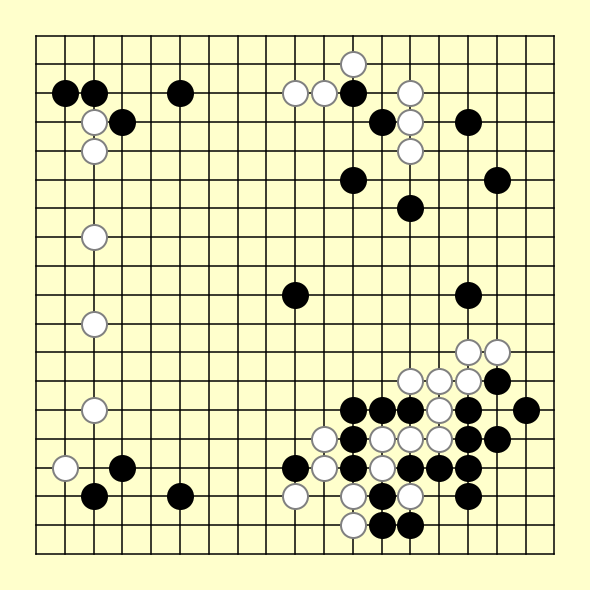

In [6]:
k = 499
b, w = ants[k]['board_state']
draw_go_board(b, w)

<AxesSubplot:>

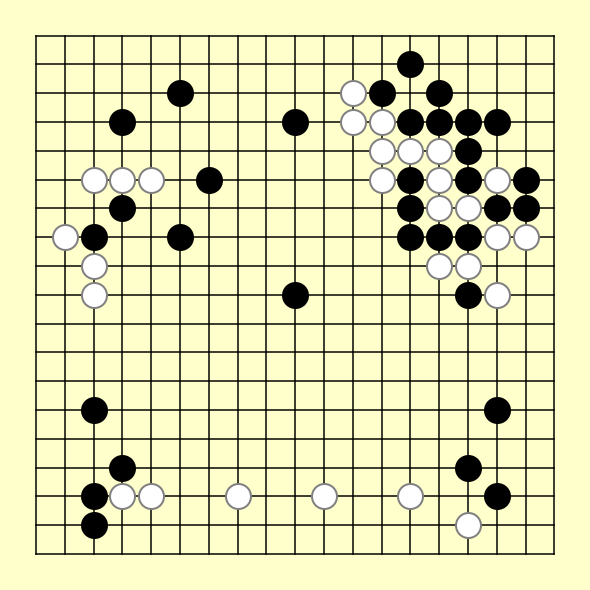

In [7]:
import numpy as np
from dlgo.gotypes import Point, Player
b = np.zeros((19, 19))
w = np.zeros((19, 19))
for key in dataset[k][0]._grid:
    if dataset[k][0].get(key) == Player.white:
        w[key.row-1][key.col-1] = 1
    elif dataset[k][0].get(key) == Player.black:
        b[key.row-1][key.col-1] = 1
draw_go_board(b, w)

<AxesSubplot:>

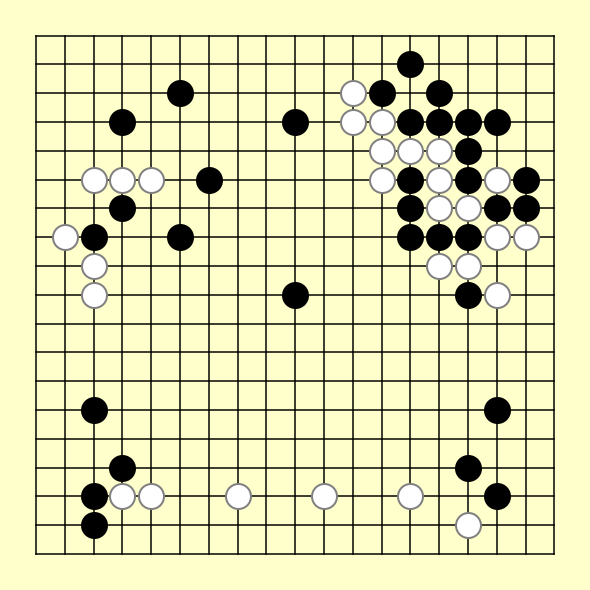

In [7]:
import numpy as np
b = np.sum(dataset[499][0][0:3], axis=0)
w = np.sum(dataset[499][0][3:6], axis=0)
draw_go_board(b, w)

In [10]:
from dlgo import goboard_fast as goboard
from dlgo.gotypes import Point, Player

from dlgo.encoders.sevenplane import SevenPlaneEncoder